In [1]:
from __future__ import division
%pylab inline

import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = '/home/ubuntu/data/models_SfMLearner/model-190532'
#ckpt_file = '../models_SfMLearner/model-190532'
#fh = 'misc/sample.png'
fh='/home/ubuntu/data/raw_data_KITTI/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000069.png'
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/ubuntu/data/models_SfMLearner/model-190532


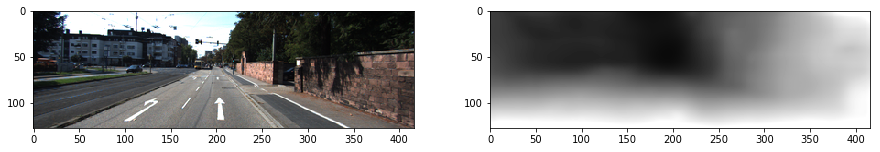

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

In [5]:
print(pred['depth'][0,:,:,0])

[[8.817828  8.837151  8.916618  ... 1.8876517 1.8808713 1.8816719]
 [8.812502  8.806304  8.887239  ... 1.9005524 1.8862627 1.8884208]
 [8.765402  8.783092  8.862944  ... 1.9226903 1.9116967 1.9113394]
 ...
 [1.9991769 1.9952894 1.990393  ... 1.8319314 1.8133733 1.8104068]
 [1.9804264 1.975242  1.9696245 ... 1.8135959 1.7933301 1.7931547]
 [1.9626063 1.9542438 1.9475956 ... 1.7954757 1.7775842 1.7800955]]


In [6]:
pred['depth'][0,:,:,0].size

53248

In [7]:
from kitti_eval.depth_evaluation_utils import *

In [104]:
depth_map_dir='/home/ubuntu/data/dfv_KITTI_depth_result_20200414/'
test_file_list='./data/kitti/test_files_eigen.txt'
test_files = read_text_lines(test_file_list)

kitti_dir='/home/ubuntu/data/raw_data_KITTI/'

pred_file2="/home/ubuntu/data/SfMLearner_result_20200413/model-190532.npy"
#SfMLearnerで生成

#disp_map=np.load(depth_map_dir )
#future

In [105]:
pred_depths2 = np.load(pred_file2)

In [106]:
pred_depths2[0].shape

(128, 416)

In [107]:
pred_depths2[0]

array([[8.817828 , 8.837151 , 8.916618 , ..., 1.8876528, 1.8808724,
        1.8816708],
       [8.812502 , 8.806304 , 8.887193 , ..., 1.9005545, 1.8862637,
        1.888423 ],
       [8.765402 , 8.783092 , 8.862873 , ..., 1.9226903, 1.9116967,
        1.9113383],
       ...,
       [1.9991733, 1.9952894, 1.9903919, ..., 1.8319293, 1.8133733,
        1.8104068],
       [1.9804252, 1.9752408, 1.9696245, ..., 1.8135968, 1.793332 ,
        1.7931566],
       [1.9626051, 1.9542426, 1.9475968, ..., 1.7954757, 1.777585 ,
        1.7800955]], dtype=float32)

In [108]:
pred_file="/home/ubuntu/data/dfv_KITTI_depth_result_20200414/result.npy"

In [109]:
pred_depths = np.load(pred_file)

In [110]:
pred_depths=pred_depths.reshape(697, 128, 416)
#size is same

In [111]:
pred_depths[0]

array([[9.057212 , 9.090018 , 9.096579 , ..., 7.3496776, 7.349495 ,
        7.3461866],
       [9.016817 , 9.069157 , 9.11157  , ..., 7.3275366, 7.308198 ,
        7.350181 ],
       [9.049914 , 9.100046 , 9.125358 , ..., 7.366736 , 7.3430696,
        7.3428745],
       ...,
       [3.7993696, 3.7985828, 3.8049679, ..., 3.4482603, 3.209363 ,
        3.250376 ],
       [3.7579477, 3.7629778, 3.7584405, ..., 3.4966323, 3.436237 ,
        3.401247 ],
       [3.741046 , 3.7395625, 3.7438278, ..., 3.1777837, 3.1721647,
        3.129415 ]], dtype=float32)

In [112]:
pred_depths[0].shape

(128, 416)

In [114]:
correlation = numpy.corrcoef(pred_depths.reshape(-1,), pred_depths2.reshape(-1,))

In [115]:
correlation

array([[1.        , 0.55254386],
       [0.55254386, 1.        ]])

In [66]:
gt_files, gt_calib, im_sizes, im_files, cams = read_file_data(test_files, kitti_dir)

In [67]:
I = pil.open(im_files[0])
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

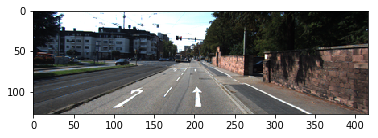

In [68]:
imshow(I)

In [69]:
gt_files[0]

'/home/ubuntu/data/raw_data_KITTI/2011_09_26/2011_09_26_drive_0002_sync/velodyne_points/data/0000000069.bin'

In [70]:
im_sizes[0]

(375, 1242)

In [71]:
num_test = len(im_files)

In [72]:
gt_depths = []
pred_depths_resized = []

In [73]:
for t_id in range(num_test):
    print(t_id)
    camera_id = cams[t_id]  # 2 is left, 3 is right
    pred_depths_resized.append(cv2.resize(pred_depths[t_id], (im_sizes[t_id][1], im_sizes[t_id][0]),interpolation=cv2.INTER_LINEAR))
    depth = generate_depth_map(gt_calib[t_id],gt_files[t_id],im_sizes[t_id],camera_id, False,True)
    gt_depths.append(depth.astype(np.float32))

0
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
1
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
2
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
3
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
4
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
5
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
6
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
7
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902

70
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
71
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
72
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
73
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
74
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
75
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
76
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
77
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -

137
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
138
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
139
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
140
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
141
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
142
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
143
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
144
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

208
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
209
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
210
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
211
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
212
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
213
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
214
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
215
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

278
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
279
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
280
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
281
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
282
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
283
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
284
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
285
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

348
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
349
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
350
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
351
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
352
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
353
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
354
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
355
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

416
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
417
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
418
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
419
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
420
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
421
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
422
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
423
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

488
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
489
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
490
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
491
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
492
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
493
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
494
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.280733e-04
 -9.998902e-01  9.998621e-01  7.523790e-03  1.480755e-02]
495
[ 7.533745e-03 -9.999714e-01 -6.166020e-04  1.480249e-02  7.28073

556
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
557
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
558
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
559
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
560
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
561
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
562
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
563
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673   0.0077531   0.00230199]
564
[ 0.00775545 -0.9999694  -0.0010143   0.00229406  0.00103212 -0.9999968
  0.9999673 

622
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
623
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
624
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
625
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
626
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
627
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
628
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.184312e-05
 -9.999975e-01  9.999728e-01  7.027479e-03 -2.255075e-03]
629
[ 7.027555e-03 -9.999753e-01  2.599616e-05 -2.254837e-03 -4.18431

689
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
690
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
691
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
692
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
693
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
694
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
695
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.241710e-04
 -9.999958e-01  9.999644e-01  7.969825e-03 -2.764397e-03]
696
[ 7.967514e-03 -9.999679e-01 -8.462264e-04 -2.771053e-03  8.24171

In [74]:
pred_depths = pred_depths_resized

In [75]:
i=0

In [76]:
gt_depth = gt_depths[i]
pred_depth = np.copy(pred_depths[i])

In [77]:
gt_depth

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 5.752, 0.   , 5.741]], dtype=float32)

In [78]:
#pred_depth[0]

In [79]:
min_depth=1e-3
max_depth=80

In [80]:
mask = np.logical_and(gt_depth > min_depth,gt_depth < max_depth)

In [81]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

In [82]:
rms     = np.zeros(num_test, np.float32)
log_rms = np.zeros(num_test, np.float32)
abs_rel = np.zeros(num_test, np.float32)
sq_rel  = np.zeros(num_test, np.float32)
d1_all  = np.zeros(num_test, np.float32)
a1      = np.zeros(num_test, np.float32)
a2      = np.zeros(num_test, np.float32)
a3      = np.zeros(num_test, np.float32)

In [83]:
gt_height, gt_width = gt_depth.shape

In [84]:
crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)
crop_mask = np.zeros(mask.shape)




In [85]:
crop_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1


In [87]:
np.set_printoptions(threshold=10)

In [88]:
mask = np.logical_and(mask, crop_mask)

In [89]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [90]:
# Scale matching
scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
pred_depth[mask] *= scalor
# Why?

pred_depth[pred_depth < min_depth] = min_depth
pred_depth[pred_depth > max_depth] = max_depth
abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = compute_errors(gt_depth[mask], pred_depth[mask])

In [91]:
for i in range(num_test):    
        gt_depth = gt_depths[i]
        pred_depth = np.copy(pred_depths[i])

        mask = np.logical_and(gt_depth > min_depth, 
                              gt_depth < max_depth)
        # crop used by Garg ECCV16 to reprocude Eigen NIPS14 results
        # if used on gt_size 370x1224 produces a crop of [-218, -3, 44, 1180]
        gt_height, gt_width = gt_depth.shape
        crop = np.array([0.40810811 * gt_height,  0.99189189 * gt_height,   
                         0.03594771 * gt_width,   0.96405229 * gt_width]).astype(np.int32)

        crop_mask = np.zeros(mask.shape)
        crop_mask[crop[0]:crop[1],crop[2]:crop[3]] = 1
        mask = np.logical_and(mask, crop_mask)

        # Scale matching
        scalor = np.median(gt_depth[mask])/np.median(pred_depth[mask])
        pred_depth[mask] *= scalor

        pred_depth[pred_depth < min_depth] = min_depth
        pred_depth[pred_depth > max_depth] = max_depth
        abs_rel[i], sq_rel[i], rms[i], log_rms[i], a1[i], a2[i], a3[i] = \
            compute_errors(gt_depth[mask], pred_depth[mask])

In [92]:
print("{:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}, {:>10}".format('abs_rel', 'sq_rel', 'rms', 'log_rms', 'd1_all', 'a1', 'a2', 'a3'))
print("{:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}, {:10.4f}".format(abs_rel.mean(), sq_rel.mean(), rms.mean(), log_rms.mean(), d1_all.mean(), a1.mean(), a2.mean(), a3.mean()))

   abs_rel,     sq_rel,        rms,    log_rms,     d1_all,         a1,         a2,         a3
    0.2622,     2.6305,     9.8645,     0.4020,     0.0000,     0.5419,     0.7948,     0.8919
